In [5]:
import numpy as np
import seaborn as sns
import matplotlib as plt
import pandas as pd
%matplotlib inline

In [8]:
# Reducing the number of emotion classes
df = pd.read_csv('text_emotion.csv',index_col=0)
df.loc[(df['sentiment']=='enthusiasm') | (df['sentiment']=='fun') |  (df['sentiment']=='love') | (df['sentiment']=='happiness') | (df['sentiment']=='relief'),'sentiment'] = 'Happy'
df.loc[(df['sentiment']=='sadness') | (df['sentiment']=='empty') | (df['sentiment']=='hate') | (df['sentiment']=='anger') | (df['sentiment']=='worry') | (df['sentiment']=='boredom'),'sentiment'] ='Sad'
df.drop(df[df.sentiment=='surprise'].index,inplace = True)

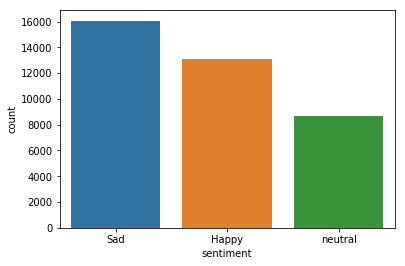

In [9]:
sns.countplot(x='sentiment',data=df)

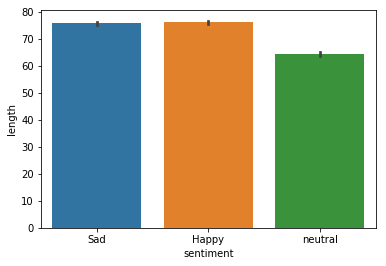

In [10]:

df['length'] = df['content'].str.len()

sns.barplot(x='sentiment',y='length',data=df)

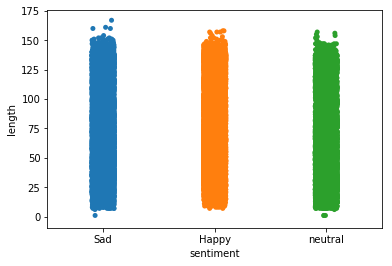

In [11]:
sns.stripplot(x='sentiment',y='length',data=df,jitter=True)

In [12]:
import string
import re
from nltk.corpus import stopwords



# stop = stopwords.words('english')
# replaced_words=['AT_USER','URL']
# stop.extend(replaced_words)

stop=['AT_USER','URL']


def text_process(tweet):
    # process the tweets

    #Convert to lower case
    tweet = tweet.lower()
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #trim
    tweet = tweet.strip('\'"')
    return [word for word in tweet.split() if word not in stop] 


df['content'].head(10).apply(text_process)




tweet_id
1956967341    [i, know, i, was, listenin, to, bad, habit, ea...
1956967666    [layin, n, bed, with, a, headache, ughhhh...wa...
1956967696              [funeral, ceremony...gloomy, friday...]
1956967789         [wants, to, hang, out, with, friends, soon!]
1956968416    [we, want, to, trade, with, someone, who, has,...
1956968477    [re-pinging, why, didn't, you, go, to, prom?, ...
1956968487    [i, should, be, sleep,, but, im, not!, thinkin...
1956968636                                    [hmmm., is, down]
1956969035                  [charlene, my, love., i, miss, you]
1956969172               [i'm, sorry, at, least, it's, friday?]
Name: content, dtype: object

In [13]:

from sklearn.feature_extraction.text import CountVectorizer #converts bag of words into vector
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split

E:\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
tweet_train,tweet_test,label_train,label_test = train_test_split(df['content'],df['sentiment'],test_size=0.3)

In [15]:
from sklearn.pipeline import Pipeline

In [16]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer = text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

pipeline.fit(tweet_train,label_train)

predictions = pipeline.predict(tweet_test)

from sklearn.metrics import classification_report

print(classification_report(label_test,predictions))


             precision    recall  f1-score   support

      Happy       0.67      0.45      0.54      4020
        Sad       0.50      0.92      0.65      4712
    neutral       0.57      0.01      0.01      2612

avg / total       0.58      0.54      0.46     11344

